In [1]:
# import all necessery library
! pip install pytorch-gradcam
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, transforms
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import albumentations as A
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import OneCycleLR
import Main
import Utils
import resnet

/usr/local/lib/python3.10/dist-packages/albumentations/augmentations/dropout/cutout.py:50: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(


Files already downloaded and verified
Files already downloaded and verified


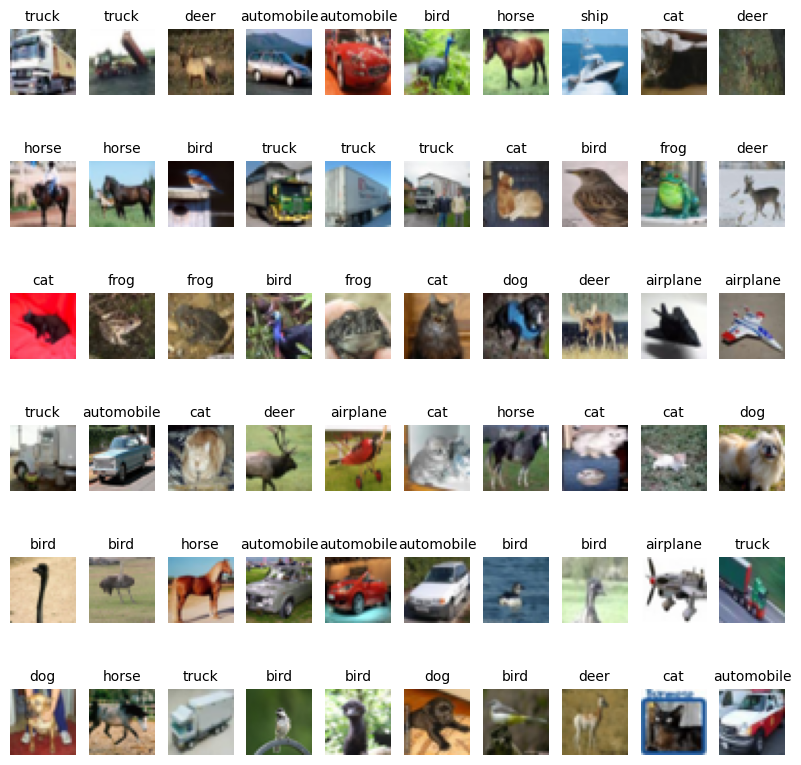

In [2]:
# Plotting the images of CIFAR10

CIFAR_train = torchvision.datasets.CIFAR10(root='./data', train=True,download=True)
CIFAR_test = torchvision.datasets.CIFAR10(root='./data', train=False,download=True)

figure = plt.figure(figsize=(10,10))
num_of_images = 60
for i in range(1,num_of_images+1):

  plt.subplot(6, 10, i)
  plt.axis('off')
  plt.title(CIFAR_train.classes[CIFAR_train[i][1]],fontsize=10)
  plt.imshow(np.asarray(CIFAR_train[i][0]), cmap='gray_r')

In [3]:
# Printing model summary

Main.print_model_summary(resnet.ResNet18(),Utils.get_device())

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [4]:
# Data loaders
train_loader , test_loader = Utils.dataloader(512,512,2,Utils.get_device())

Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torch_lr_finder/lr_finder.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


  0%|          | 0/200 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 4.93E-02


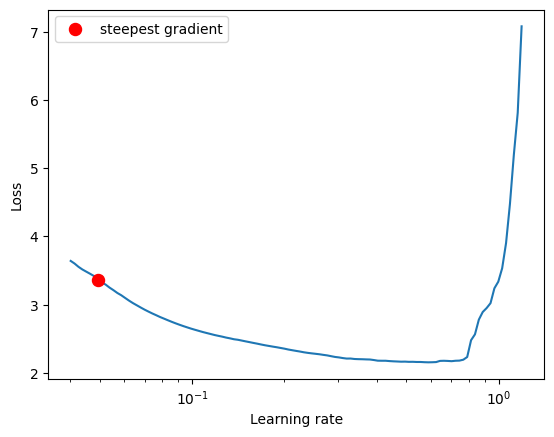

In [5]:
# Finding the max lr

!pip install torch_lr_finder
from torch_lr_finder import LRFinder

model = resnet.ResNet18()
optimizer = optim.Adam(model.parameters(), lr=0.03, weight_decay = 1e-4)
criterion = nn.CrossEntropyLoss()
lr_finder = LRFinder(model,optimizer,criterion,device=Utils.get_device())
lr_finder.range_test(train_loader,end_lr=10,num_iter=200,step_mode="exp")
lr_finder.plot()
lr_finder.reset()

In [6]:
# Running the model

model = resnet.ResNet18()
EPOCHS = 20
optimizer = optim.Adam(model.parameters(), lr=0.03, weight_decay = 1e-4)
scheduler = OneCycleLR(optimizer, max_lr=4.93E-02,steps_per_epoch=len(train_loader),epochs=EPOCHS,pct_start=5/EPOCHS,div_factor=100,three_phase=False,final_div_factor=100)
criterion = nn.CrossEntropyLoss()

model, train_accuracy, train_losses, test_accuracy, test_losses = Main.experiment(model,train_loader,test_loader,optimizer,scheduler,criterion,EPOCHS)



EPOCH: 0


Loss=1.273415207862854 LR=0.005172100769491095 Batch_id=97 Accuracy=45.51: 100%|██████████| 98/98 [00:42<00:00,  2.31it/s]



Test set: Average loss: 0.0053, Accuracy: 3298/10000 (32.98%)

EPOCH: 1


Loss=0.8608632683753967 LR=0.017415071608211923 Batch_id=97 Accuracy=58.53: 100%|██████████| 98/98 [00:41<00:00,  2.34it/s]



Test set: Average loss: 0.0027, Accuracy: 5684/10000 (56.84%)

EPOCH: 2


Loss=0.8684700727462769 LR=0.03252700446835656 Batch_id=97 Accuracy=65.52: 100%|██████████| 98/98 [00:41<00:00,  2.33it/s]



Test set: Average loss: 0.0025, Accuracy: 5734/10000 (57.34%)

EPOCH: 3


Loss=0.9037236571311951 LR=0.0447128079348083 Batch_id=97 Accuracy=67.46: 100%|██████████| 98/98 [00:42<00:00,  2.33it/s]



Test set: Average loss: 0.0024, Accuracy: 5976/10000 (59.76%)

EPOCH: 4


Loss=0.8460249304771423 LR=0.049299943712960495 Batch_id=97 Accuracy=68.91: 100%|██████████| 98/98 [00:41<00:00,  2.36it/s]



Test set: Average loss: 0.0026, Accuracy: 5701/10000 (57.01%)

EPOCH: 5


Loss=0.8274180889129639 LR=0.04875038538977839 Batch_id=97 Accuracy=69.95: 100%|██████████| 98/98 [00:41<00:00,  2.36it/s]



Test set: Average loss: 0.0077, Accuracy: 3225/10000 (32.25%)

EPOCH: 6


Loss=0.9425478577613831 LR=0.04714763231091147 Batch_id=97 Accuracy=70.97: 100%|██████████| 98/98 [00:41<00:00,  2.36it/s]



Test set: Average loss: 0.0061, Accuracy: 3339/10000 (33.39%)

EPOCH: 7


Loss=0.7929680347442627 LR=0.044561732476768805 Batch_id=97 Accuracy=71.98: 100%|██████████| 98/98 [00:41<00:00,  2.37it/s]



Test set: Average loss: 0.0045, Accuracy: 4094/10000 (40.94%)

EPOCH: 8


Loss=0.7820583581924438 LR=0.041105702118626505 Batch_id=97 Accuracy=72.79: 100%|██████████| 98/98 [00:41<00:00,  2.37it/s]



Test set: Average loss: 0.0020, Accuracy: 6532/10000 (65.32%)

EPOCH: 9


Loss=0.7733492851257324 LR=0.03693058634700901 Batch_id=97 Accuracy=74.07: 100%|██████████| 98/98 [00:41<00:00,  2.38it/s]



Test set: Average loss: 0.0029, Accuracy: 5314/10000 (53.14%)

EPOCH: 10


Loss=0.7440263032913208 LR=0.03221885775556428 Batch_id=97 Accuracy=75.21: 100%|██████████| 98/98 [00:41<00:00,  2.37it/s]



Test set: Average loss: 0.0022, Accuracy: 6608/10000 (66.08%)

EPOCH: 11


Loss=0.6406944990158081 LR=0.02717644149312068 Batch_id=97 Accuracy=76.13: 100%|██████████| 98/98 [00:41<00:00,  2.38it/s]



Test set: Average loss: 0.0016, Accuracy: 7225/10000 (72.25%)

EPOCH: 12


Loss=0.671959400177002 LR=0.022023715346544757 Batch_id=97 Accuracy=77.98: 100%|██████████| 98/98 [00:40<00:00,  2.39it/s]



Test set: Average loss: 0.0023, Accuracy: 6478/10000 (64.78%)

EPOCH: 13


Loss=0.5167250633239746 LR=0.016985878173965182 Batch_id=97 Accuracy=80.00: 100%|██████████| 98/98 [00:41<00:00,  2.39it/s]



Test set: Average loss: 0.0014, Accuracy: 7608/10000 (76.08%)

EPOCH: 14


Loss=0.506597638130188 LR=0.012283107634048529 Batch_id=97 Accuracy=82.27: 100%|██████████| 98/98 [00:41<00:00,  2.39it/s]



Test set: Average loss: 0.0012, Accuracy: 8000/10000 (80.00%)

EPOCH: 15


Loss=0.495120108127594 LR=0.008120937365785891 Batch_id=97 Accuracy=84.49: 100%|██████████| 98/98 [00:40<00:00,  2.40it/s]



Test set: Average loss: 0.0010, Accuracy: 8241/10000 (82.41%)

EPOCH: 16


Loss=0.41763895750045776 LR=0.004681274182209207 Batch_id=97 Accuracy=87.06: 100%|██████████| 98/98 [00:40<00:00,  2.39it/s]



Test set: Average loss: 0.0009, Accuracy: 8513/10000 (85.13%)

EPOCH: 17


Loss=0.2833939790725708 LR=0.0021144478697759585 Batch_id=97 Accuracy=90.16: 100%|██████████| 98/98 [00:40<00:00,  2.39it/s]



Test set: Average loss: 0.0008, Accuracy: 8721/10000 (87.21%)

EPOCH: 18


Loss=0.1968851536512375 LR=0.000532641055338678 Batch_id=97 Accuracy=93.02: 100%|██████████| 98/98 [00:41<00:00,  2.39it/s]



Test set: Average loss: 0.0007, Accuracy: 8800/10000 (88.00%)

EPOCH: 19


Loss=0.1684059351682663 LR=4.98628703950403e-06 Batch_id=97 Accuracy=94.42: 100%|██████████| 98/98 [00:41<00:00,  2.38it/s]



Test set: Average loss: 0.0007, Accuracy: 8813/10000 (88.13%)



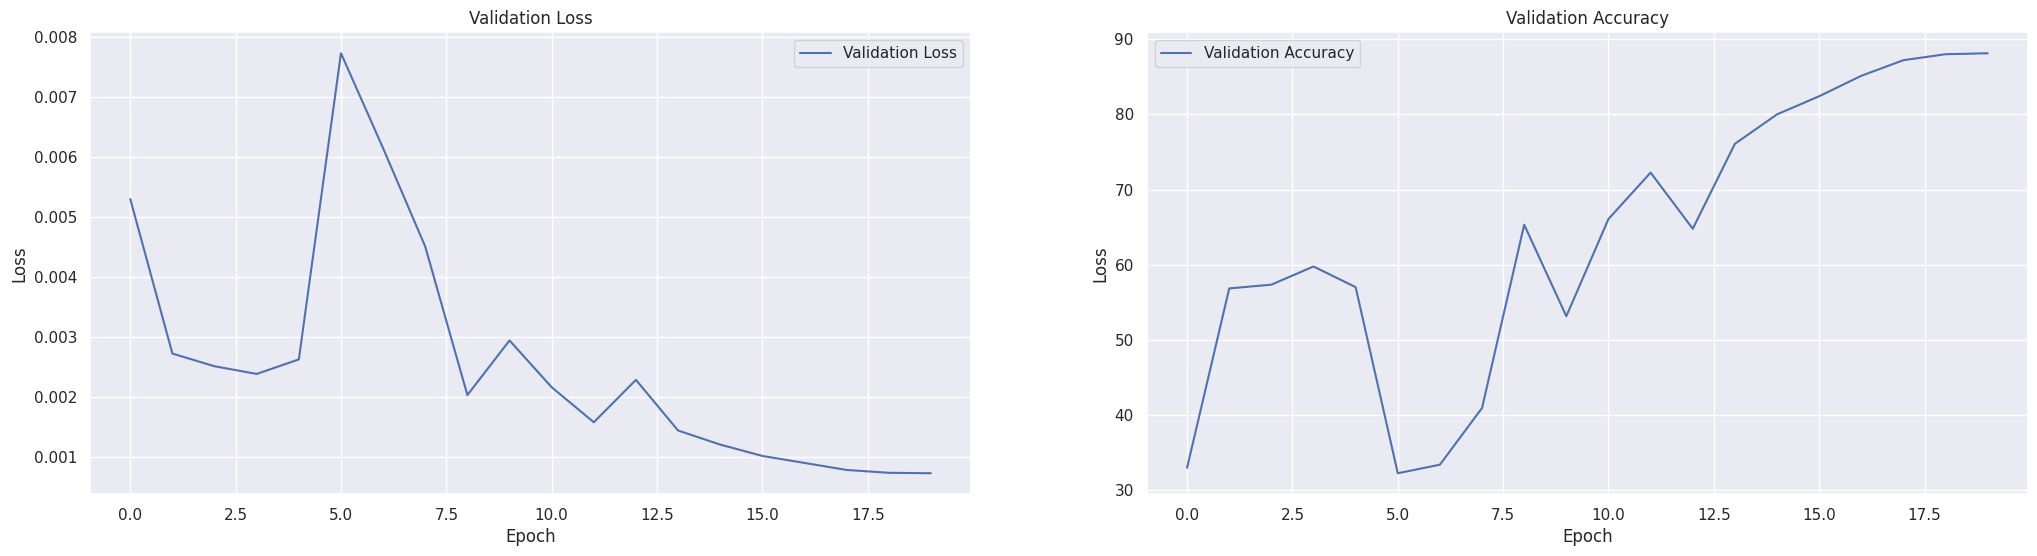

In [7]:
# PLot matrcis
Utils.plot_metrics(train_accuracy, train_losses, test_accuracy, test_losses)

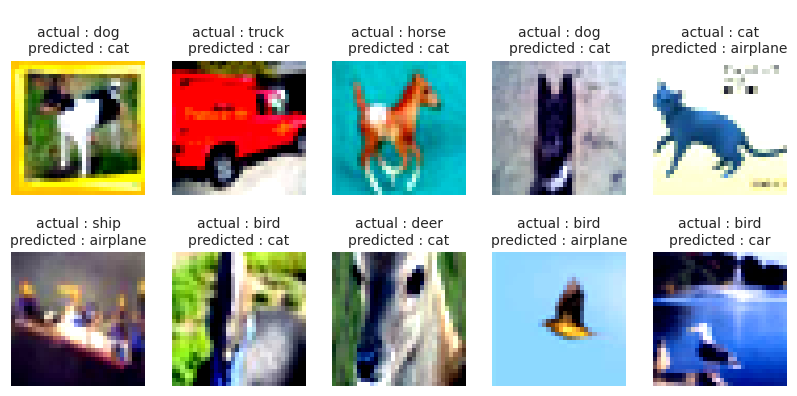

In [8]:
# Visualizing wrong prediction
wrong_predictions = Utils.identify_wrong_predictions(model,test_loader)

In [9]:
Utils.plot_gradCAM(wrong_predictions, 0, 10, model)

NameError: ignored